sources = 
* https://realpython.com/python-opencv-color-spaces/
* https://pyimagesearch.com/2014/08/18/skin-detection-step-step-example-using-python-opencv/
* https://github.com/noorkhokhar99/skindetection
* https://github.com/CHEREF-Mehdi/SkinDetection
* https://github.com/mpatacchiola/deepgaze

In [14]:
import cv2
import numpy as np
from PIL import Image

#Open a simple image
img=cv2.imread("sample/2016-08-27_19-08-47_UTC.jpg")

#converting from gbr to hsv color space
img_HSV = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
#skin color range for hsv color space 
HSV_mask = cv2.inRange(img_HSV, (0, 15, 0), (17,170,255)) 
HSV_mask = cv2.morphologyEx(HSV_mask, cv2.MORPH_OPEN, np.ones((3,3), np.uint8))

#converting from gbr to YCbCr color space
img_YCrCb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
#skin color range for hsv color space 
YCrCb_mask = cv2.inRange(img_YCrCb, (0, 135, 85), (255,180,135)) 
YCrCb_mask = cv2.morphologyEx(YCrCb_mask, cv2.MORPH_OPEN, np.ones((3,3), np.uint8))

#merge skin detection (YCbCr and hsv)
global_mask=cv2.bitwise_and(YCrCb_mask,HSV_mask)
global_mask=cv2.medianBlur(global_mask,3)
global_mask = cv2.morphologyEx(global_mask, cv2.MORPH_OPEN, np.ones((4,4), np.uint8))


HSV_result = cv2.bitwise_not(HSV_mask)
YCrCb_result = cv2.bitwise_not(YCrCb_mask)
global_result=cv2.bitwise_not(global_mask)

In [20]:
global_result

(665, 665)

In [15]:
# Save the result images
cv2.imwrite("HSV_Result.jpg", HSV_result)
cv2.imwrite("YCrCb_Result.jpg", YCrCb_result)
cv2.imwrite("Global_Result.jpg", global_result)

# Display images using Pillow
Image.open("HSV_Result.jpg").show()
Image.open("YCrCb_Result.jpg").show()
Image.open("Global_Result.jpg").show()


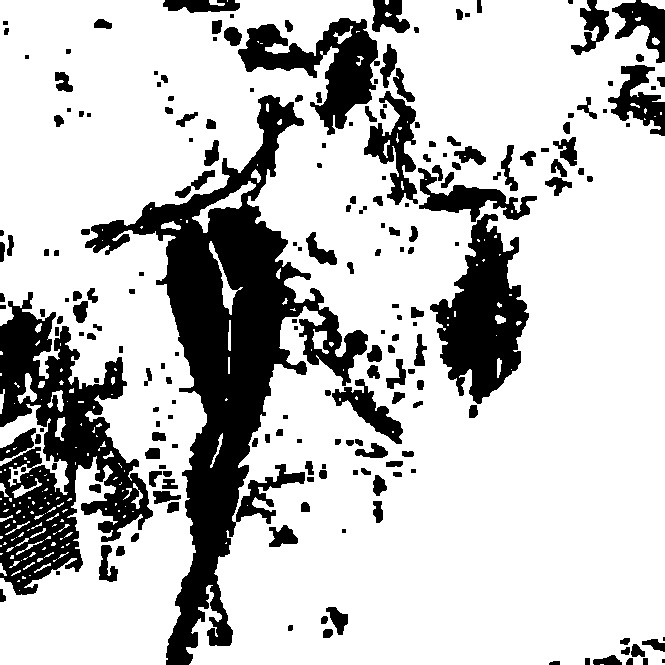

In [24]:
raw_image = Image.open('Global_Result.jpg').convert('RGB')
raw_image